In [ ]:
Pkg.add("Roots")
Pkg.add("ForwardDiff")

In [ ]:
using Roots  
using Plots
using ForwardDiff

In [ ]:
f1(x) = sin(x) - x/2
f2(x) = 2*x-exp(-x)
f3(x) = x * exp(-x)
f4(x) = ( x + 3 ) * ( x - 1 )^2
f5(x) = x^3
f6(x) = cos(x) - x

In [ ]:
b_x_1 = find_zero(f1, (0, 1), Bisection(), verbose=true)
b_x_2 = find_zero(f2, (0, 1), Bisection(), verbose=true)
b_x_3 = find_zero(f3, (0, 1), Bisection(), verbose=true)
b_x_4 = find_zero(f4, (0, 1), Bisection(), verbose=true)
b_x_5 = find_zero(f5, (0, 1), Bisection(), verbose=true)
b_x_6 = find_zero(f6, (0, 1), Bisection(), verbose=true)

In [ ]:
D(f1) = x->ForwardDiff.derivative(f1, float(x))
D(f2) = x->ForwardDiff.derivative(f2, float(x))
D(f3) = x->ForwardDiff.derivative(f3, float(x))
D(f4) = x->ForwardDiff.derivative(f4, float(x))
D(f5) = x->ForwardDiff.derivative(f5, float(x))
D(f6) = x->ForwardDiff.derivative(f6, float(x))

n_x_1 = find_zero((f1, D(f1)),0, Roots.Newton(),verbose=true)
n_x_2 = find_zero((f2, D(f2)),0, Roots.Newton(),verbose=true)
n_x_3 = find_zero((f3, D(f3)),0, Roots.Newton(),verbose=true)
n_x_4 = find_zero((f4, D(f4)),0, Roots.Newton(),verbose=true)
n_x_5 = find_zero((f5, D(f5)),0, Roots.Newton(),verbose=true)
n_x_6 = find_zero((f6, D(f6)),0, Roots.Newton(),verbose=true)

In [ ]:
s_x_1 = find_zero(f1, 0, Order1(),  verbose=true)
s_x_2 = find_zero(f2, 0, Order1(),  verbose=true)
s_x_3 = find_zero(f3, 0, Order1(),  verbose=true)
s_x_4 = find_zero(f4, 0, Order1(),  verbose=true)
s_x_5 = find_zero(f5, 0, Order1(),  verbose=true)
s_x_6 = find_zero(f6, 0, Order1(),  verbose=true)

In [ ]:
function test(g::Function, x)
    return (g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0 
        || abs(g(x)) <= 1e-15 || sign(g(prevfloat(x))) *sign(g(nextfloat(x))) <= 0)
end

In [ ]:
using DataFrames

df = DataFrame(f_x = ["sin(x) - x/2", "2*x-exp(-x)", "x * exp(-x)", "(x + 3) * (x - 1)^2", 
        "x^3", "cos(x) - x"],
    iterations_bisection = [0, 61, 0, 0, 0, 60],
    evaluations_bisection = [2, 63, 2, 2, 2, 62],
    test_b_x = [test(f1, b_x_1), test(f2, b_x_2), test(f3, b_x_3), 
    test(f4, b_x_4), test(f5, b_x_5), test(f6, b_x_6)],
    iterations_newton = [0, 4, 0, 26, 0, 5],
    evaluations_newton = [1, 9, 1, 53, 1, 11],
    test_n_x = [test(f1, n_x_1), test(f2, n_x_2), test(f3, n_x_3), 
    test(f4, n_x_4), test(f5, n_x_5), test(f6, n_x_6)],
    iterations_secant_method = [0, 5, 0, 37, 0, 7],
    evaluations_secant_method = [2, 7, 2, 39, 2, 9],
    test_s_x = [test(f1, s_x_1), test(f2, s_x_2), test(f3, s_x_3), 
    test(f4, s_x_4), test(f5, s_x_5), test(f6, s_x_6)],)

In [ ]:
using Plots

plot(x->cos(x) - x, 0, 1)

In [ ]:
# bisekcja nie zadziała
f_n_b(x) = x^2

plot(x->f_n_b(x), -1, 1)

In [ ]:
x_b = find_zero(f_n_b, (-1, 1), Bisection(), verbose=true)

In [ ]:
# newton nie zadziała
f_n_n(x) = 1-x^2

plot(x->f_n_n(x), -1 ,2)

In [ ]:
D(f_n_n) = x->ForwardDiff.derivative(f_n_n, float(x))

plot(D(f_n_n), -1 ,2)

In [ ]:
n_x = find_zero((f_n_n, D(f_n_n)),0, Roots.Newton(),verbose=true)


In [ ]:
# przewidywanie nie zadziała (metoda siecznych)

f_n_s(x) = x^3 - 20
plot(f_n_s, 0, 4)

In [ ]:
s_x = find_zero(f_n_s, 0, Order1(),  verbose=true)

In [ ]:
# wstęga newtona

using Images

f_n_N(x) = x^3-1
d_f_n_N(x) = 3 * x^2

In [ ]:
function color(i, shade)
    value = 0.55 - shade * 1/25
    colors = [RGB(1, value, value), RGB(value, 1, value),RGB(value, value, 1)]
    return colors[i]
end

In [ ]:
function roots(i)
    roots = [(1 + 0im), (-.5 + sqrt(3)/2im), (-.5 - sqrt(3)/2im)]
    return roots[i]
end

In [ ]:
function fractal()
    image = zeros(RGB, 512 ,512)
    for x=1:512
        x_s = -2.5 + x * 3.5/512
        for y=1:512
            y_s = -1 + y * 2/512
            z = (x_s + y_s * im)
            
            found = false
            for i=1:150
                z -= f_n_N(z) / d_f_n_N(z)
                
                tolerance = 0.000001
                
                for j=1:3
                    difference = z - roots(j)
                    if abs(difference) < tolerance
                        image[y,x] = color(j, i)
                        found = true
                    end
                end
                
                if found
                    break
                end
            end
        end
    end
    return image
end

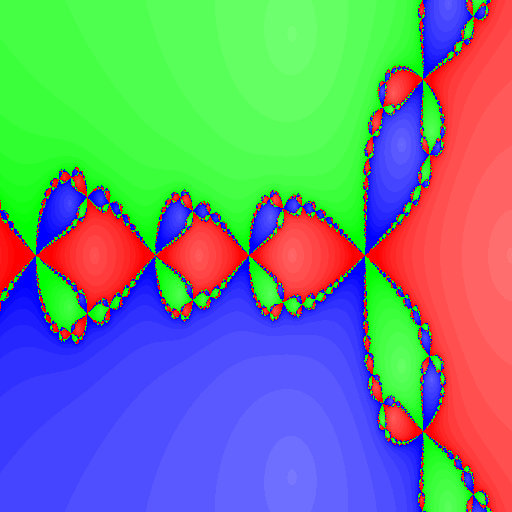

In [21]:
fractal()

fractal(1)

In [32]:
-1.5*10^6/(4*10^10)

-3.75e-5